# Natural Language Processing (NLP) ===> Sentiment Analysis

In [1]:
import pandas as pd

columns=['Polarity', 'ID', 'Date', 'Query', 'User', 'Text']

train_df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='iso-8859-1', header=None, names=columns)
test_df = pd.read_csv('testdata.manual.2009.06.14.csv', encoding='iso-8859-1', header=None, names=columns)

In [2]:
train_df.head(3)

,Polarity,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Polarity  1600000 non-null  int64 
 1   ID        1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Query     1600000 non-null  object
 4   User      1600000 non-null  object
 5   Text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
train_df['Polarity'].unique()

array([0, 4])

In [5]:
test_df.head(3)

,Polarity,ID,Date,Query,User,Text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Polarity  498 non-null    int64 
 1   ID        498 non-null    int64 
 2   Date      498 non-null    object
 3   Query     498 non-null    object
 4   User      498 non-null    object
 5   Text      498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


In [7]:
test_df['Polarity'].unique()

array([4, 0, 2])

In [8]:
test_df = test_df[test_df['Polarity'] != 2]
# test_df.drop(test_df[test_df['Polarity'] == 2].index, inplace=True)

In [9]:
test_df['Polarity'].unique(), test_df.shape

(array([4, 0]), (359, 6))

# Preprocessing: The dataset must be cleaned and tokenized.

## Cleaning text data

In [10]:
# custom preprocessor
import re
def preprocessor(text):
    text = re.sub(r'\s*@\w+', '', text)   # remove words starting with @ 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs 
    text = re.sub(r'<[^>]*>', '', text)   # remove all of the HTML markup
    text = re.sub(r'\b\w\b', '', text)  # remove single letters I a ...
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)  # find emoticons (emoji)
    text = (re.sub(r'[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')) 
    # lowercase words, replace any non_word with space, add emojis at the end
    return text

## Separating feature and target

In [11]:
y_train = train_df['Polarity']
y_test = test_df['Polarity']

In [12]:
X_train = train_df['Text'].apply(preprocessor)
X_test = test_df['Text'].apply(preprocessor)

In [13]:
X_train[0:4]

0     that bummer you shoulda got david carr of thi...
1    is upset that he can update his facebook by te...
2     dived many times for the ball managed to save...
3      my whole body feels itchy and like its on fire 
Name: Text, dtype: object

In [14]:
X_test[0:4]

0     loooooooovvvvvveee my kindle2 not that the dx...
1    reading my kindle2 love it lee childs is good ...
2    ok first assesment of the kindle2 it fucking r...
3     you ll love your kindle2 ve had mine for few ...
Name: Text, dtype: object

## Tokenizing text data

In [15]:
# install Natural Language Toolkit
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt_tab')  # For word_tokenize
nltk.download('stopwords')  # For stopword list

def simple_tokenizer(text):
    stop_words = set(stopwords.words('english'))    # Define stopwords (English)
    tokens = word_tokenize(text)   # Tokenize the text   
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # Remove stopwords    
    return filtered_tokens

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Apply tokenization

In [17]:
X_train_tokens = X_train.apply(simple_tokenizer)
X_test_tokens = X_test.apply(simple_tokenizer)

## Convert textual tokens into numerical features

### 1.Bag-of-Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()

X_train_bow = bow_vectorizer.fit_transform(X_train_tokens.apply(lambda x: ' '.join(x))) # tokens are list of word parts
X_test_bow = bow_vectorizer.transform(X_test_tokens.apply(lambda x: ' '.join(x)))

### 2.TF-IDF (term frequency-inverse document frequency) to downweight frequent words 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tokens.apply(lambda x: ' '.join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test_tokens.apply(lambda x: ' '.join(x)))

# Training models

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression on the bag-of-words features
lr_model_bow = LogisticRegression(max_iter = 500)
lr_model_bow.fit(X_train_bow, y_train)
# Train Logistic Regression on the TF-IDF features
lr_model_tfidf = LogisticRegression(max_iter = 500)
lr_model_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500)

### Naïve Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Train Naïve Bayes on the bag-of-words features
nb_model_bow = MultinomialNB()
nb_model_bow.fit(X_train_bow, y_train)
# Train Naïve Bayes on the TF-IDF features
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

## Make prediction on the test set

In [22]:
# Logistic Regression
lr_predictions_bow = lr_model_bow.predict(X_test_bow)
lr_predictions_tfidf = lr_model_tfidf.predict(X_test_tfidf)

# Naïve Bayes
nb_predictions_bow = nb_model_bow.predict(X_test_bow)
nb_predictions_tfidf = nb_model_tfidf.predict(X_test_tfidf)

## Evaluate models

In [23]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression (BoW):")
print("Accuracy:", accuracy_score(y_test, lr_predictions_bow))
print("Classification Report:\n", classification_report(y_test, lr_predictions_bow))

print("Naïve Bayes (BoW):")
print("Accuracy:", accuracy_score(y_test, nb_predictions_bow))
print("Classification Report:\n", classification_report(y_test, nb_predictions_bow))

print("Logistic Regression (TF-IDF):")
print("Accuracy:", accuracy_score(y_test, lr_predictions_tfidf))
print("Classification Report:\n", classification_report(y_test, lr_predictions_tfidf))

print("Naïve Bayes (TF-IDF):")
print("Accuracy:", accuracy_score(y_test, nb_predictions_tfidf))
print("Classification Report:\n", classification_report(y_test, nb_predictions_tfidf))

Logistic Regression (BoW):
Accuracy: 0.8050139275766016
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       177
           4       0.79      0.84      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.81      0.81      0.80       359

Naïve Bayes (BoW):
Accuracy: 0.8050139275766016
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       177
           4       0.80      0.82      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.81      0.81      0.80       359

Logistic Regression (TF-IDF):
Accuracy: 0.807799442896936
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       177
   

## Visualize with Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name, feature_type):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name} ({feature_type})')
    plt.show()

### Logistic Regression (BoW)

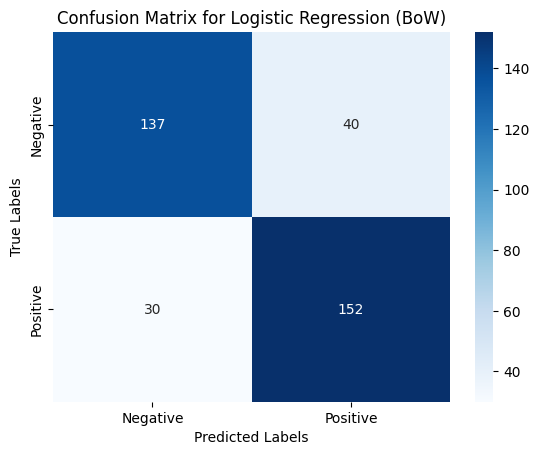

In [31]:
plot_confusion_matrix(y_test, lr_predictions_bow, model_name="Logistic Regression", feature_type="BoW")

### Logistic Regression (TF-IDF)

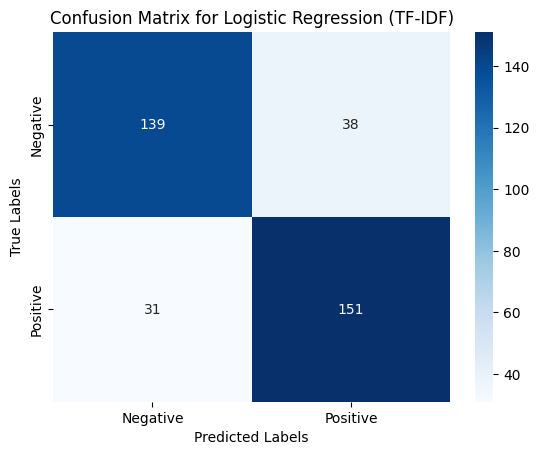

In [32]:
plot_confusion_matrix(y_test, lr_predictions_tfidf, model_name="Logistic Regression", feature_type="TF-IDF")

### Naïve Bayes (BoW)

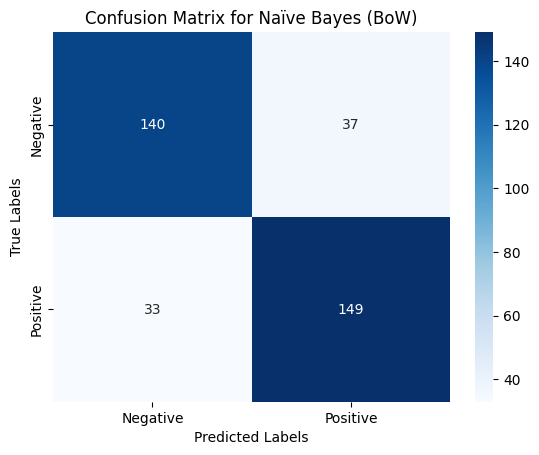

In [33]:
plot_confusion_matrix(y_test, nb_predictions_bow, model_name="Naïve Bayes", feature_type="BoW")

### Naïve Bayes (TF-IDF)

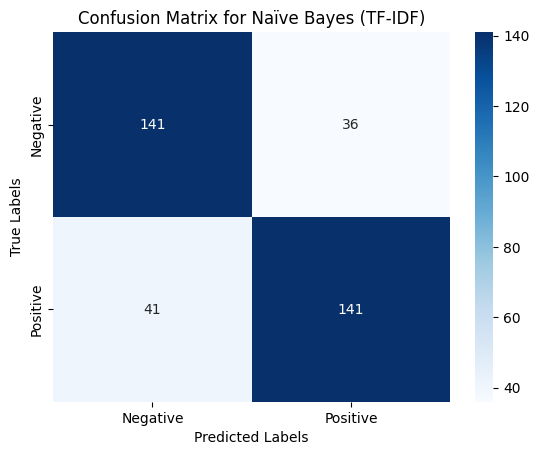

In [34]:
plot_confusion_matrix(y_test, nb_predictions_tfidf, model_name="Naïve Bayes", feature_type="TF-IDF")

## Testing the models on text samples

In [44]:
#text = 'I hate this, too difficult.'
#text = 'lovely @jllkj, cannot wait to see you ;), I hope to be freinds!'
text = "It's all right."

# Preprocess and tokenize
sample = ' '.join(simple_tokenizer(preprocessor(text)))  # Convert tokens back to a single string

# Transform the text using the trained vectorizers
sample_bow = bow_vectorizer.transform([sample])  # Bag-of-Words
sample_tfidf = tfidf_vectorizer.transform([sample])  # TF-IDF

# Logistic Regression
lr_predictions_bow = lr_model_bow.predict(sample_bow)
lr_predictions_tfidf = lr_model_tfidf.predict(sample_tfidf)

# Naïve Bayes
nb_predictions_bow = nb_model_bow.predict(sample_bow)
nb_predictions_tfidf = nb_model_tfidf.predict(sample_tfidf)

lr_predictions_bow, lr_predictions_tfidf, nb_predictions_bow, nb_predictions_tfidf   # 0: Neg, 4: Pos

(array([4]), array([4]), array([0]), array([0]))

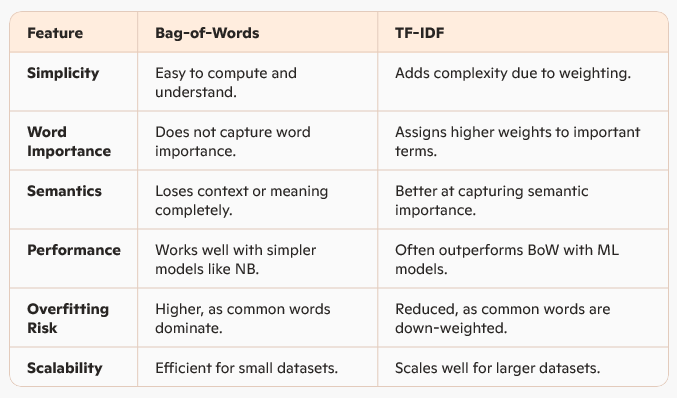